In [2]:
library("ggplot2")

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
pewDF <- read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header=TRUE, sep=",")

In [14]:
head(pewDF)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


# Which age group play more video games and how does this vary with sex?

Select only the required columns for the analysis.

In [15]:
helperDF1 <- pewDF %>% select(sex,age,game1)

Remove all the rows where the details are not available.

In [16]:
helperDF1 <- helperDF1 %>% na.omit()

Change the numerical values for the game1 and sex variables to user readable values.

In [17]:
helperDF1 <- within(helperDF1, game1 <- factor(game1, labels = c("Yes","No","Don't Know","Refused")))
helperDF1 <- within(helperDF1, sex <- factor(sex, labels = c("Male","Female")))

We are only interested in people who play and do not play, so we filter these rows.

In [18]:
helperDF1 <- helperDF1 %>% filter(game1 =="Yes" | game1 =="No")  

Rename the variable names for better representation in the graph.

In [19]:
helperDF1 <- helperDF1 %>% rename(Sex=sex,Play_Video_Games = game1, Age = age)

Divide the ages into groups for better analysis

In [22]:
helperDF1$Age_Category <-cut(helperDF1$Age,c(17,40,60,80,100))

Plotting the required graph with qplot

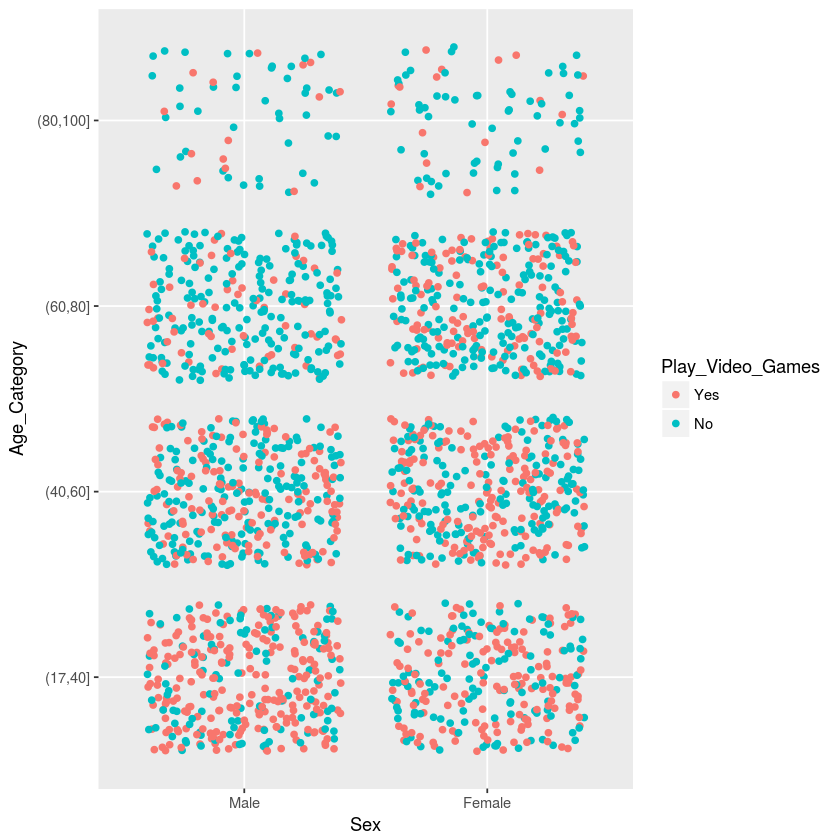

In [23]:
qplot(Sex, Age_Category, colour = Play_Video_Games, data=helperDF1, geom="jitter",size = I(1.5))

#### Hypothesis: 
It can be learnt from the above plot that people in the age group of 18 to 40 are more interested in playing video games.Also, the interest in playing decreases in the users as they age. We can also infer that male users tend to play more than female.

# How does the well-being of a community depend on its economy?

Select only the required variables, i.e q1 and q3 for the analysis.

In [174]:
helperDF2 <- pewDF %>% select(q1,q3) %>% na.omit()

We are only interested in people who have given their opinion so we filter out the refused and "Don't Know" opinions.

In [175]:
helperDF2 <- helperDF2 %>% filter(q1 < 5 & q3 < 5 ) 

Rename the variable names (q1 and q3) to user readable form.

In [ ]:
helperDF2 <- helperDF2 %>% rename(Well_being_of_community = q1,Economy_of_community = q3)

Change the numerical values for the Well_being_of_community and Economy_of_community variables to user readable values.

In [170]:
helperDF2 <- within(helperDF2, q1 <- factor(q1, labels = c("Excellent","Good","Only fair","Poor")))
helperDF2 <- within(helperDF2, q3 <- factor(q3,  labels = c("Excellent","Good","Only fair","Poor")))

Plotting the required graph with qplot

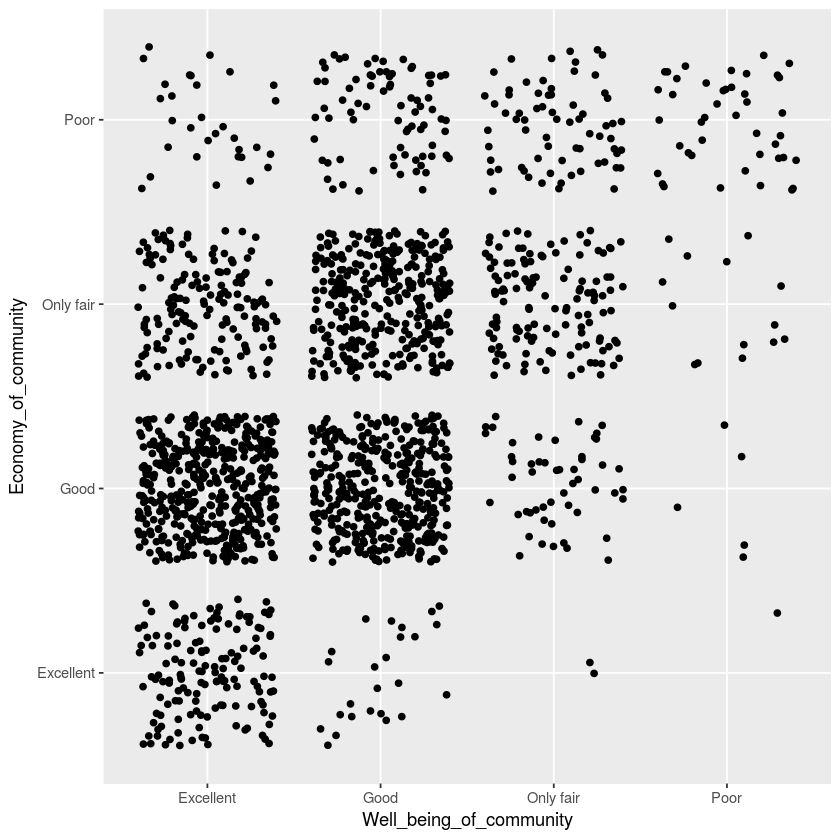

In [172]:
qplot(Well_being_of_community, Economy_of_community, data=helperDF2, geom="jitter")

#### Hypothesis:
It can be learnt from the above plot "well being of a community" or the happiness is directly correlated to the economy. If the economy is poor, people are not comfortable and hence the people are not happy. 

# How does the ideology with respect to politics vary with age?

Select only the required columns, i.e age and ideo for the analysis.

In [208]:
helperDF4 <- pewDF %>% select(age,ideo)

Filter out only the required rows, i.e people who refused and said "Don't Know are not considered"

In [209]:
helperDF4 <- helperDF4 %>% filter(ideo < 6)

Change the numerical values for the ideo to user readable values.

In [210]:
helperDF4 <- within(helperDF4, ideo <- factor(ideo, labels = c("Very conservative","Conservative","Moderate","Liberal","Very liberal")))

Rename the variable names to user readable form.

In [211]:
helperDF4 <- helperDF4 %>% rename(Age=age, Category=ideo)

In [212]:
head(helperDF4)

Age,Category
47,Very conservative
63,Moderate
86,Very conservative
40,Conservative
65,Very conservative
69,Moderate


Divide the ages into groups for better analysis

In [203]:
#helperDF4$Age_Categories <-cut(helperDF4$Age,c(17,30,40,50,60,70,80,90,100))
helperDF4$Age_Categories <-cut(helperDF4$Age,c(17,40,50,60,80,100))

Plotting the required graph with qplot

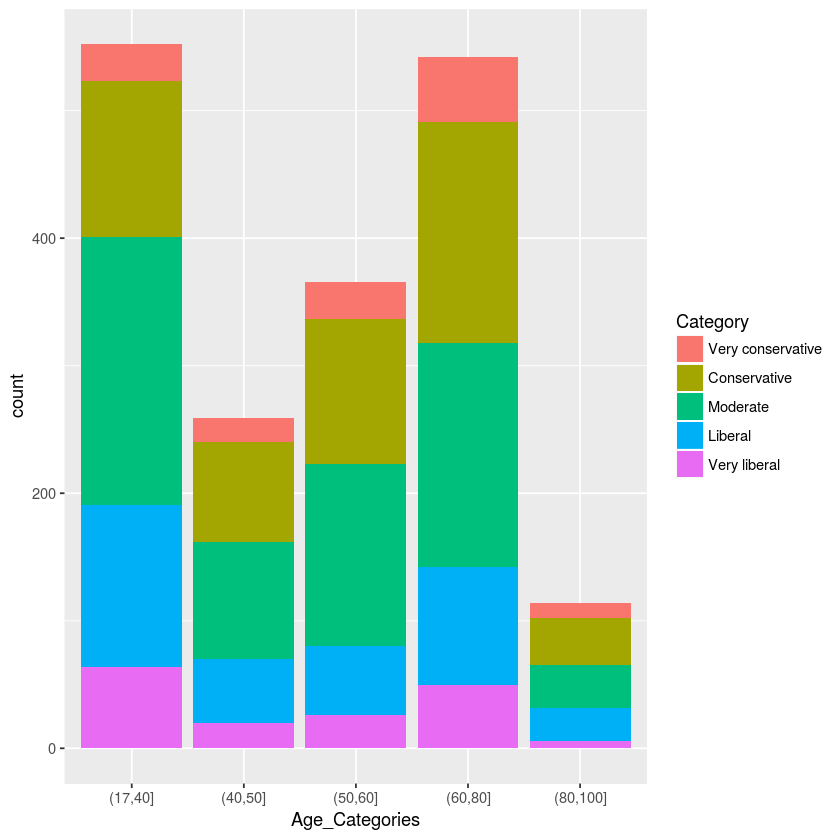

In [204]:
qplot(Age_Categories, data=helperDF4, geom="bar", fill=Category)

#### Hypothesis
From the above plot, we can infer that young people are mostly liberal and moderate in their views towards a political party.As people grow older they form opinions about the poilical parties due to the past experiences and hence tend to be more conservative in nature.

# Which category of people (by Race) date online and who started first?

Select only the required columns, i.e Race,Age and Dating.

In [32]:
helperDF3 <- pewDF %>% select(race,age,date1a)

Change the values of the variables to user readable form

In [33]:
helperDF3 <- within(helperDF3, date1a <- factor(date1a, labels = c("Yes","No","Don't Know","Refused"))) 
helperDF3 <- within(helperDF3, race <- factor(race, labels = c("White","Black/African-American","Asian/Pacific-Islander","Mixed-race","Native-American/American-Indian")))

Filter out only the required rows, i.e people who refused and said "Don't Know" are not considered

In [ ]:
helperDF3 <- helperDF3 %>% filter(race < 6 )  %>% filter(date1a =="Yes" | date1a =="No")  

Change the names of the variables to user readable form

In [34]:
helperDF3 <- helperDF3 %>% rename(Sex=sex,No_of_Adults = hh1, Race = race,Dated_Online=date1a)

Categorise the age for better analysis

In [35]:
helperDF3$Age_Categories <-cut(helperDF3$age,c(17,40,60,80,100))

Plotting the required graph with qplot

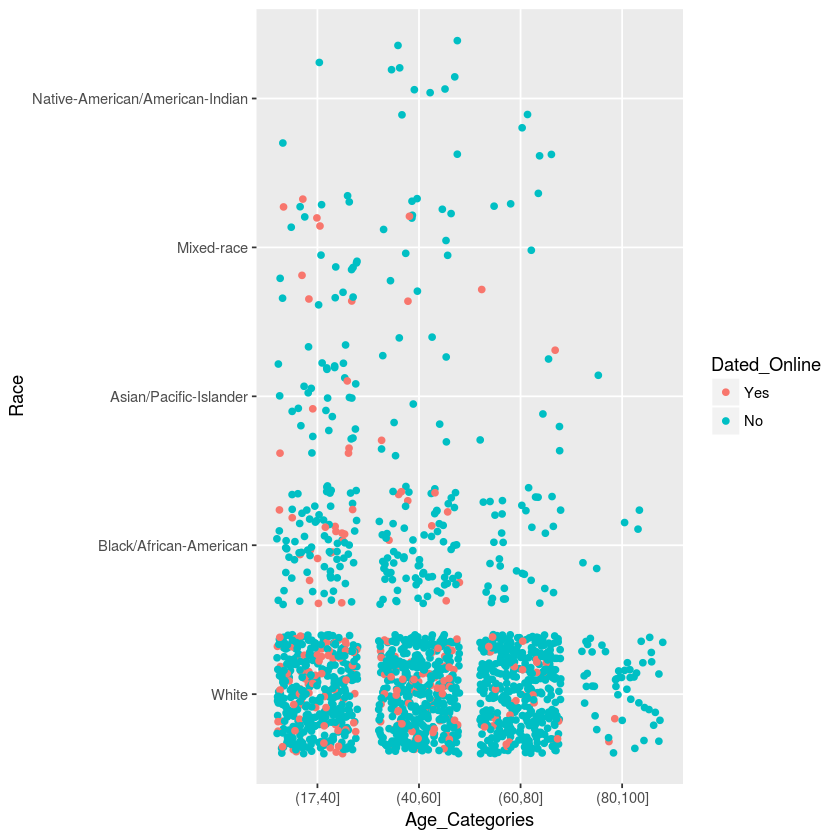

In [40]:
qplot(Age_Categories,Race,color = Dated_Online, data=helperDF3, geom="jitter",size = I(1.5)) 

#### Hypothesis
From the above plot,it can be inferred that White people have started to date online first as we can see few white people in the age group of 60-80 who dated online and not in other categories. Also, this culture has passed onto the younger generations and hence we see more white people date online compared to the rest.

# How does the manual work at job vary with the level of education of people (in other words, the skill set required for the job) ?

Select only the required columns, i.e Manual labor at work and the education level for the analysis.

In [122]:
helperDF5 <- pewDF %>% select(emptype2,educ2) %>% na.omit()

Variable names are renamed to user readable form

In [123]:
helperDF5 <- helperDF5 %>% rename(Labor_Involved=emptype2, Education_Level=educ2)

Filter out only the required rows, i.e people who refused and said "Don't Know" are not considered

In [124]:
helperDF5 <- helperDF5 %>% filter(Labor_Involved < 3) %>% filter(Education_Level<9)

Change the values of the variables to user readable form

In [ ]:
helperDF5 <- within(helperDF5, Labor_Involved <- factor(Labor_Involved, labels = c("Yes","No")))
helperDF5 <- within(helperDF5, Education_Level <- factor(Education_Level, labels = c("Less than high school","High school incomplete","High school graduate","Some college, no degree","Two year associate degree ","Four year college or university degree/Bachelor’s degree","Some postgraduate or professional schooling, no postgraduate degree","Postgraduate or professional degree")))

In [125]:
head(helperDF5)

Labor_Involved,Education_Level
Yes,Two year associate degree
No,Four year college or university degree/Bachelor’s degree
No,"Some college, no degree"
No,Four year college or university degree/Bachelor’s degree
No,"Some college, no degree"
No,Four year college or university degree/Bachelor’s degree


Plotting the required graph with qplot

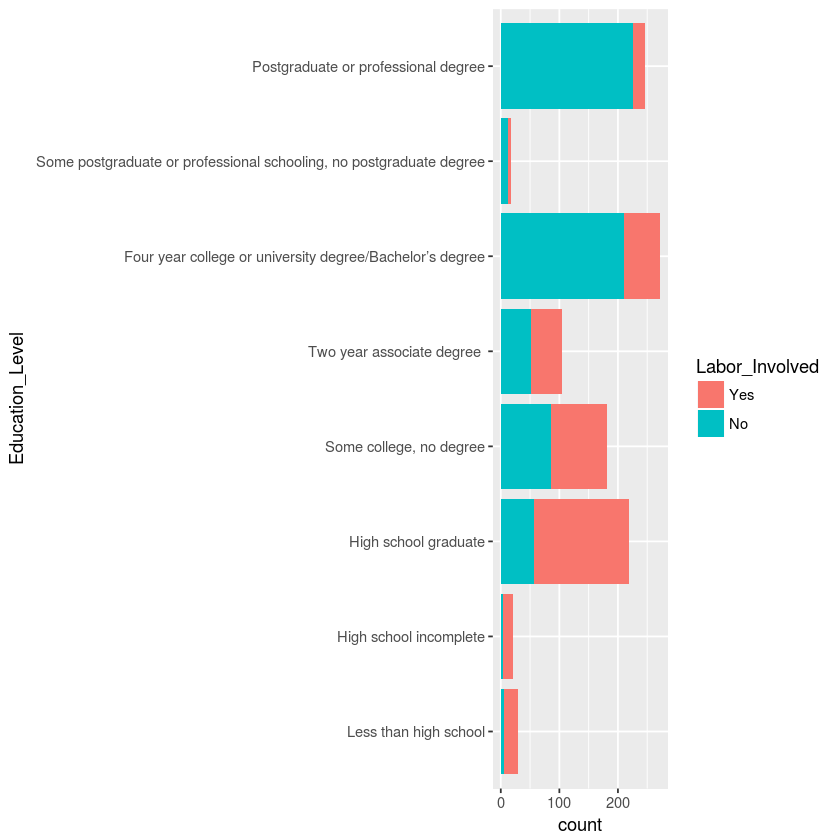

In [231]:
qplot(Education_Level, data=helperDF5, geom="bar", fill=Labor_Involved) + coord_flip() 

#### Hypothesis
From the above plot,it can be inferred that the amount of labor involved at work or work which requires less technical knowledge are done by people whose education level is low. As the education level increases, the labor work involved is decreased as the work involves more of technical knowledge.